In [1]:
import pandas
import seaborn
import sklearn
import functions as covid_lib
from random import random
from matplotlib import pyplot as plt

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
from dash.dependencies import Input, Output 

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

---
## 1st Dataset : John Hopkins Data

In [2]:
## John Hopkins Center for Systems Science and Engineer Data Base URL
## Contains timeseries data
## This set of data is updated daily
baseURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

cumulated_confirmed_url = baseURL + "time_series_covid19_confirmed_global.csv"
cumulated_deaths_url    = baseURL + "time_series_covid19_deaths_global.csv"
cumulated_recovered_url = baseURL + "time_series_covid19_recovered_global.csv"

cumulated_confirmed     = pd.read_csv(cumulated_confirmed_url)
cumulated_deaths        = pd.read_csv(cumulated_deaths_url)
cumulated_recovered     = pd.read_csv(cumulated_recovered_url)

## Processed Dataset
## Combine by Country/Region
cumulated_confirmed_country = covid_lib.df_groupby_countries(cumulated_confirmed)
cumulated_deaths_country = covid_lib.df_groupby_countries(cumulated_deaths)
cumulated_recovered_country = covid_lib.df_groupby_countries(cumulated_recovered)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
print("Confirmed data shape : " + str(cumulated_confirmed_country.shape))
print("Recovered data shape : " + str(cumulated_deaths_country.shape))
print("Deaths data shape : " + str(cumulated_recovered_country.shape))

Confirmed data shape : (188, 165)
Recovered data shape : (188, 165)
Deaths data shape : (188, 165)


In [4]:
# ## To find specific instances on certain countries
# ## Consider grouping by countries to simplify the analysis process
# cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="US"].head()

In [5]:
cumulated_confirmed_country.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,186,189,197,212,212,259,267,276,284,291


In [6]:
unique_countries = cumulated_confirmed_country["Country/Region"].unique()

In [7]:
cumulated_deaths_country[cumulated_deaths_country["Country/Region"]=="Taiwan*"]


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20
165,Taiwan*,23.7,121.0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7


In [8]:
## Call this only if you wanna wait forever
proceed = False
if proceed:
    for country in unique_countries:
        covid_lib.plt_all_cases_increase_cases(country, cumulated_confirmed_country  )

In [9]:
# US_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="US"].head()
# US_confirmed

# all_cases, increased_case = covid_lib.df_to_timeseries(US_confirmed, 7)

In [10]:
# plot_acf(temp_data, lags = 20 , alpha = 0.05) 
# plot_acf(increased_case.dropna())
# plot_pacf(increased_case.dropna())

In [21]:
yhat


2020-07-02    0.999998
2020-07-03    0.999997
2020-07-04    0.999996
2020-07-05    0.999995
2020-07-06    0.999994
                ...   
2020-10-06    0.999886
2020-10-07    0.999885
2020-10-08    0.999884
2020-10-09    0.999883
2020-10-10    0.999882
Freq: D, Length: 101, dtype: float64

In [53]:
yhat 

array([447.00011854, 447.00017348, 447.00025058, 447.00032103,
       447.00039333, 447.00046514, 447.00053707, 447.00060897,
       447.00068088, 447.00075279, 447.0008247 ])

In [50]:
query_country = "Taiwan*"
query_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]==query_country]
queried_total_cases, queried_increased_case = covid_lib.df_to_timeseries(query_confirmed, 1)
model = SARIMAX(queried_total_cases, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(queried_total_cases), len(queried_total_cases)+10)
print(yhat)
plot_all( queried_total_cases, queried_increased_case, yhat , query_country )

[447.00011854 447.00017348 447.00025058 447.00032103 447.00039333
 447.00046514 447.00053707 447.00060897 447.00068088 447.00075279
 447.0008247 ]


<IPython.core.display.Javascript object>

[  1.           1.           3.           3.           4.
   5.           8.           8.           9.          10.
  10.          10.          10.          11.          11.
  16.          16.          17.          18.          18.
  18.          18.          18.          18.          18.
  20.          22.          22.          23.          24.
  26.          26.          28.          30.          31.
  32.          32.          34.          39.          40.
  41.          42.          42.          44.          45.
  45.          45.          45.          47.          48.
  49.          50.          53.          59.          67.
  77.         100.         108.         135.         153.
 169.         195.         215.         235.         252.
 267.         283.         298.         306.         322.
 329.         339.         348.         355.         363.
 373.         376.         379.         380.         382.
 385.         388.         393.         393.         395.
 395.         

<IPython.core.display.Javascript object>

In [48]:
def plot_all( total_cases, increased_case, yhat, country = "Taiwan"):
    
### Plotting

#     predicted_cases = np.concatenate((total_cases[:,0], yhat + total_cases[-1,0]))
    predicted_cases = np.concatenate((total_cases[:,0],  yhat))
    print(predicted_cases)
    figure = plt.figure(figsize=(10,10))

    plt.subplot(2,2,1)
    plt.title("Original Total Cases")
    plt.plot(total_cases)
    
    plt.subplot(2,2,2)
    plt.plot(increased_case.dropna())
    plt.title("Increased case")
    plt.xticks(rotation=45)
    plt.xticks(np.arange(0, len(increased_case.dropna()), (len(increased_case.dropna()) / 7))) 
    
    plt.subplot(2,2,3)
    plt.plot(predicted_cases)
    plt.title("Total Cases and forcasted")


    plt.subplot(2,2,4)
    plt.plot(yhat)
    plt.xticks(rotation=90)
    plt.title("yhat")
    
    plt.savefig("img/" + str(country)+ "_all_charts.png",  bbox_inches='tight')
    plt.close('all')

### Taiwan Analysis

In [12]:
TW_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="Taiwan*"].head()
total_cases, increased_case = covid_lib.df_to_timeseries(TW_confirmed, 7)


In [13]:
### TODO : I doing SARIMA on the total or the increase index?

---

### Changes in total Cases

In [14]:

# SARIMA example
model = SARIMAX(total_cases, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=True)
yhat = model_fit.predict(len(total_cases), len(total_cases)+100)
print(yhat)

[447.00011854 447.00017348 447.00025058 447.00032103 447.00039333
 447.00046514 447.00053707 447.00060897 447.00068088 447.00075279
 447.0008247  447.00089661 447.00096852 447.00104043 447.00111233
 447.00118424 447.00125615 447.00132806 447.00139997 447.00147188
 447.00154379 447.00161569 447.0016876  447.00175951 447.00183142
 447.00190333 447.00197524 447.00204715 447.00211905 447.00219096
 447.00226287 447.00233478 447.00240669 447.0024786  447.00255051
 447.00262241 447.00269432 447.00276623 447.00283814 447.00291005
 447.00298196 447.00305387 447.00312577 447.00319768 447.00326959
 447.0033415  447.00341341 447.00348532 447.00355723 447.00362913
 447.00370104 447.00377295 447.00384486 447.00391677 447.00398868
 447.00406059 447.0041325  447.0042044  447.00427631 447.00434822
 447.00442013 447.00449204 447.00456395 447.00463586 447.00470776
 447.00477967 447.00485158 447.00492349 447.0049954  447.00506731
 447.00513922 447.00521112 447.00528303 447.00535494 447.00542685
 447.00549

### Changes in increase curve

In [15]:
 
# SARIMA example 
# contrived dataset
# data = [x + random() for x in range(1, 100)]
# fit model
model = SARIMAX(increased_case.dropna(), order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=True)
## Disp
## If True, convergence information is printed. For the default l_bfgs_b solver, disp controls the frequency of the output during the iterations. disp < 0 means no output in this case.

# make prediction
yhat = model_fit.predict(len(increased_case.dropna()), len(increased_case.dropna())+100)
print(yhat)

2020-07-02    0.999998
2020-07-03    0.999997
2020-07-04    0.999996
2020-07-05    0.999995
2020-07-06    0.999994
                ...   
2020-10-06    0.999886
2020-10-07    0.999885
2020-10-08    0.999884
2020-10-09    0.999883
2020-10-10    0.999882
Freq: D, Length: 101, dtype: float64


/home/mavericku/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



---

In [16]:
covid_lib.plot_all( total_cases, increased_case, yhat , "Taiwan" )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'yhat')

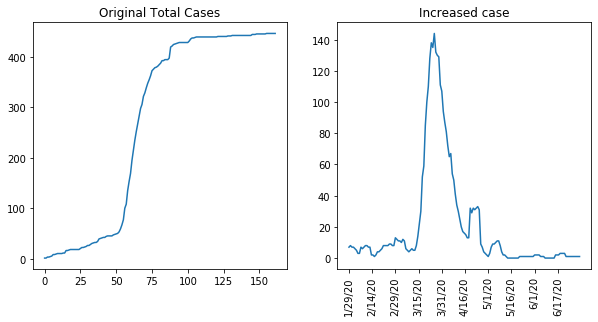

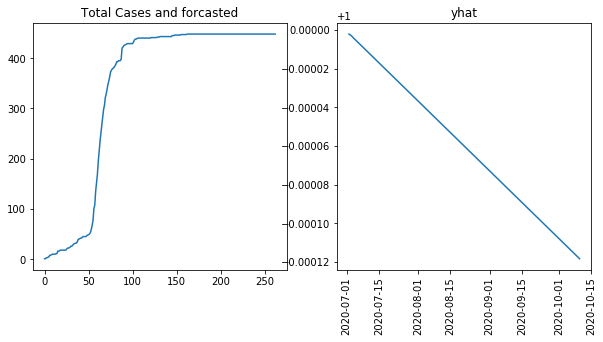

In [17]:

### Plotting

predicted_cases = np.concatenate((total_cases[:,0], yhat + total_cases[-1,0]))

figure = plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Original Total Cases")
plt.plot(total_cases)

plt.subplot(2,2,2)
plt.plot(increased_case.dropna())
plt.title("Increased case")
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(increased_case.dropna()), (len(increased_case.dropna()) / 10))) 

figure = plt.figure(figsize = (10,10))
plt.subplot(2,2,3)
plt.plot(predicted_cases)
plt.title("Total Cases and forcasted")


plt.subplot(2,2,4)
plt.plot(yhat)
plt.xticks(rotation=90)
plt.title("yhat")
